In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customer_df = pd.read_csv('../data/Wholesale_customers_data.csv')
customer_df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [3]:
customer_df.shape

(440, 6)

# Correlation and Redundancy

I claim that there is correlation and redundancy in the `customer` table. What I mean by this is that some features are linear combinations of other features. 

Let's examine redundancy by dropping a feature and seeing if the other features can predict it.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [5]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = KNeighborsRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [6]:
calculate_r_2_for_feature(customer_df,'Detergents_Paper')

0.77837829944484793

In [7]:
print("{:24} {}".format("Delicatessen: ", calculate_r_2_for_feature(customer_df,'Delicatessen')))
print("{:24} {}".format("Degergents_paper: ", calculate_r_2_for_feature(customer_df,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", calculate_r_2_for_feature(customer_df,'Fresh')))
print("{:24} {}".format("Frozen: ", calculate_r_2_for_feature(customer_df,'Frozen')))
print("{:24} {}".format("Grocery: ", calculate_r_2_for_feature(customer_df,'Grocery')))
print("{:24} {}".format("Milk: ", calculate_r_2_for_feature(customer_df,'Milk')))

Delicatessen:            0.07308740871743646
Degergents_paper:        0.8337896104781876
Fresh:                   -0.18165471379498133
Frozen:                  0.0775153247433572
Grocery:                 0.6610317749814641
Milk:                    0.4867131588504443


But this is subject to randomness. There is randomness in my `train_test_split`. Let's do the whole thing many times and take the average. 

In [8]:
def mean_r2_for_feature(data, feature):
    scores = []
    for _ in range(100):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [9]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_df,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_df,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_df,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_df,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_df,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_df,'Milk')))

Delicatessen:            -0.005392089843331615
Detergents_Paper:        0.777709713958338
Fresh:                   0.029984868448939102
Frozen:                  0.07117773205785108
Grocery:                 0.7231379934224056
Milk:                    0.4791251900146505


In [10]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_df,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_df,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_df,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_df,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_df,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_df,'Milk')))

Delicatessen:            -0.03711470429481151
Detergents_Paper:        0.7634784868412049
Fresh:                   0.019174863003386618
Frozen:                  0.05861036351339928
Grocery:                 0.7272536727264565
Milk:                    0.44979338172620476


#### Discussion

What does this tell us?

## Visualize Redundancy

Study the correlation of the data.

168.6377568244934


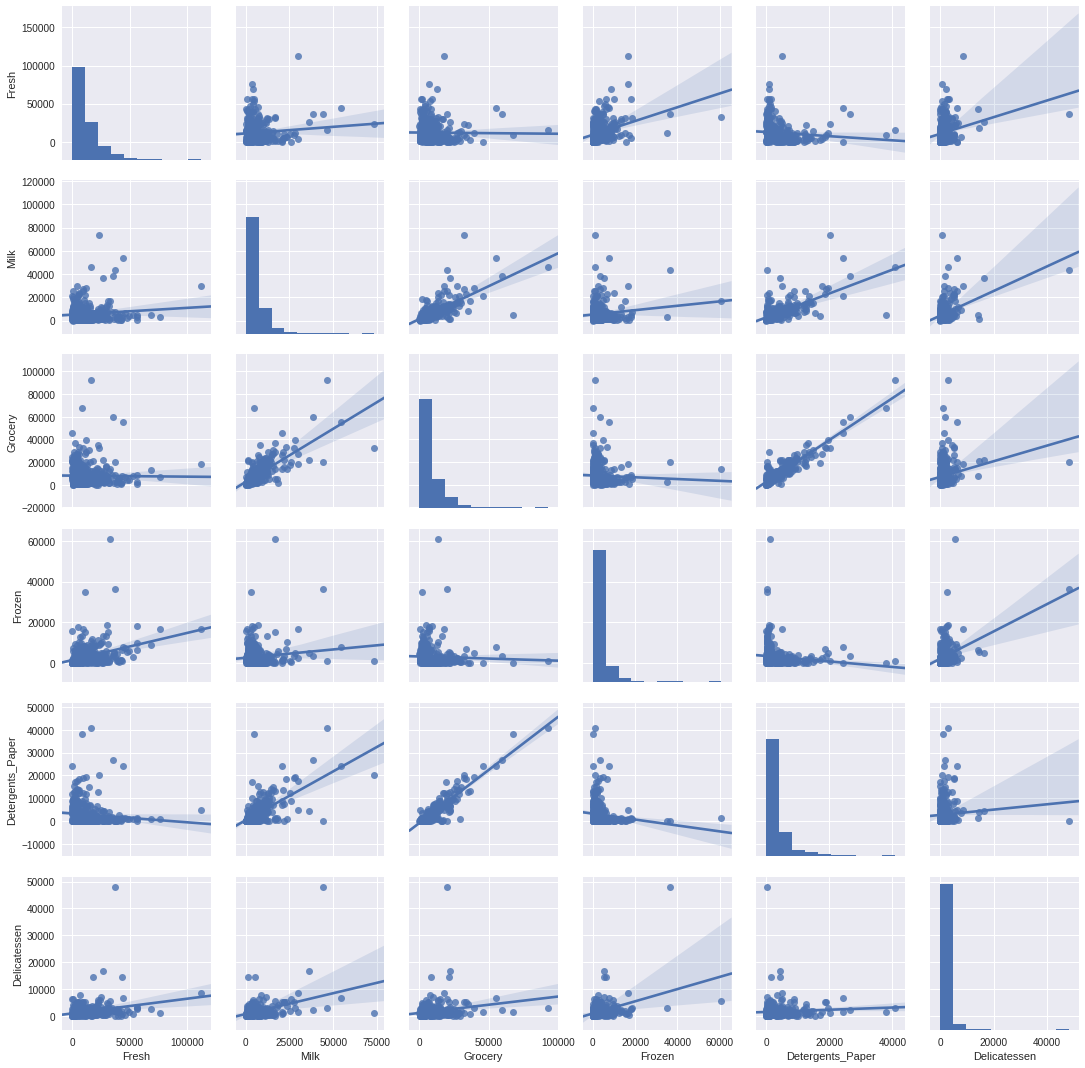

In [11]:
import time
start = time.time()
sns.pairplot(customer_df, kind='reg')
print(time.time() - start)

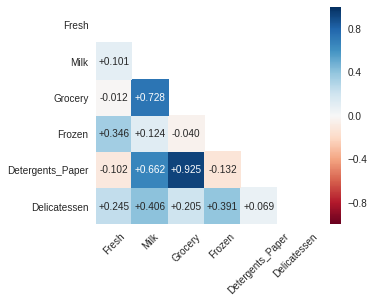

In [12]:
corr = customer_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')